In [47]:
from S15lib.instruments import TimeStampTDC1
import matplotlib.pyplot as plt
import numpy as np

# Setup device, count singles

In [52]:
dev = TimeStampTDC1('/dev/tty.usbmodemTDC1_00121') # user your own device
dev.level = dev.TTL_LEVELS
print('Counts in channels: ', dev.get_counts(1))

Counts in channels:  (99996, 0, 0, 99995)


# Event time correlations

(0.0, 100.0)

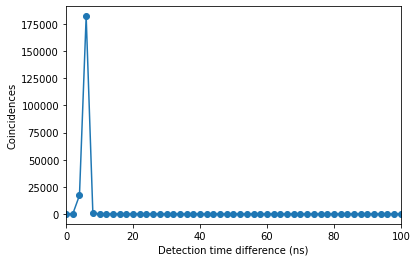

In [50]:
dev.level = dev.TTL_LEVELS
info = dev.count_g2(2)

plt.figure()
plt.plot(info['time_bins'], info['histogram'], 'o-')
plt.xlabel('Detection time difference (ns)')
plt.ylabel('Coincidences')
plt.xlim(0, 100)


# Get timestamps

In [92]:
acq_time = 1
cmd = '*RST;' + 'NIM;' + 'time ' + str(acq_time * 1000) + ';timestamp;counts?'
buffer = dev._com._stream_response_into_buffer(cmd, acq_time + 0.1)
bytes_hex = buffer[::-1].hex()

ts_word_list = [int(bytes_hex[i:i + 8], 16) for i in range(0, len(bytes_hex), 8)][::-1]

ts_list = []
pattern_list = []
periode_count = 0
periode_duration = 1<<27
prev_ts = -1
for ts_word in ts_word_list:
    time_stamp = (ts_word) >> 5
    pattern = ts_word & 0x1f
#     print(bin(ts_word), bin(pattern))
    print(time_stamp, bin(pattern))

    if prev_ts != -1 and time_stamp < prev_ts: #or ((prev_pattern & 0x10) == 0 and time_stamp == 67112824)):
            periode_count +=1
            print(periode_count)
    prev_ts = time_stamp
#     prev_pattern = pattern
    if pattern & 0x10 == 0:
        ts_list.append(time_stamp + periode_duration * periode_count)
        pattern_list.append(pattern)

# ts_list = list(map(lambda x: x*2, ts_list))
ts_list = np.array(ts_list) * 2
print(ts_list * 1e-9, pattern_list)

28 Bytes Recorded
67112824 0b10001
3960 0b10001
1
23482717 0b1
3960 0b10001
2
67112824 0b10001
3960 0b10001
3
5058517 0b1
[0.31540089 0.8154234 ] [1, 1]


In [94]:
dev._com.write(b'timestamp')

9

In [47]:
len('0b10000000000000011110111100010001')

34

In [77]:
format(((67112824 << 5) + 0x11), 'x')

'8001ef11'

In [66]:
48845117 < 67112824

True